In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('../../data/08.Regression_for_hyperparameters/Best_models_by_ST098_and_LL_validation_summaries_with_range_stats.csv')
data = data.groupby('sp').first().reset_index(drop=False)

# import re
# pat = re.compile(r'ent(?P<ent>[\d\.e-]+)_dist(?P<dist>[\d\.e-]+)_pow(?P<pow>[\d\.e-]+).hdf5')

# ents, dists, pows = [], [], []
# for fn in data['model'].values:
#     m = pat.search(fn)
#     if not m:
#         continue
#     ents.append(float(m.group('ent')))
#     dists.append(float(m.group('dist')))
#     pows.append(float(m.group('pow')))

# data['ent'] = ents
# data['dist'] = dists
# data['pow'] = pows



In [3]:
data.ORDER1_eBird.unique()


array(['Passeriformes', 'Charadriiformes', 'Falconiformes',
       'Anseriformes', 'Pelecaniformes', 'Caprimulgiformes',
       'Accipitriformes', 'Strigiformes', 'Gruiformes', 'Gaviiformes',
       'Suliformes', 'Columbiformes', 'Piciformes', 'Cathartiformes'],
      dtype=object)

In [4]:
data.training_n_intervals

0        77
1        45
2       164
3      2144
4      2299
       ... 
148     268
149     119
150      59
151    1905
152    1927
Name: training_n_intervals, Length: 153, dtype: int64

## Gourp by order?

In [5]:
sum_ = data['ent'] + data['dist']
data['ent'] = data['ent']/sum_
data['dist'] = data['dist']/sum_
# Because the ent + dist chanegs for the relative weight of obs, and the weight obs is simply for matching the S&T distribution, we might 
# need to normalize it.

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
print('Order clustering silhouette score', silhouette_score(StandardScaler().fit_transform(data[['ent','dist','pow']]), data[['ORDER1_eBird']]))
print('Family clustering silhouette score', silhouette_score(StandardScaler().fit_transform(data[['ent','dist','pow']]), data[['FAMILY1_eBird']]))
print('Family clustering silhouette score (passerine only)', silhouette_score(StandardScaler().fit_transform(
    data[data['ORDER1_eBird']=='Passeriformes'][['ent','dist','pow']]), 
    data[data['ORDER1_eBird']=='Passeriformes'][['FAMILY1_eBird']]))

print('======== for each hyperparameter =======')
for hyperparam in ['ent', 'dist', 'pow']:
    print(f'Order clustering silhouette score (for {hyperparam})', silhouette_score(StandardScaler().fit_transform(data[[hyperparam]]), data[['ORDER1_eBird']]))
    print(f'Family clustering silhouette score (for {hyperparam})', silhouette_score(StandardScaler().fit_transform(data[[hyperparam]]), data[['FAMILY1_eBird']]))
    print(f'Family clustering silhouette score (for {hyperparam}) (passerine only)', silhouette_score(StandardScaler().fit_transform(
        data[data['ORDER1_eBird']=='Passeriformes'][[hyperparam]]), 
        data[data['ORDER1_eBird']=='Passeriformes'][['FAMILY1_eBird']]))


Order clustering silhouette score -0.6357712879577323
Family clustering silhouette score -0.7669982436444307
Family clustering silhouette score (passerine only) -0.7527550670289861
======== for each hyperparameter =======
Order clustering silhouette score (for ent) -0.8185096673833722
Family clustering silhouette score (for ent) -0.86928104559943
Family clustering silhouette score (for ent) (passerine only) -0.8899949770193548
Order clustering silhouette score (for dist) -0.8185096685150528
Family clustering silhouette score (for dist) -0.869281045751634
Family clustering silhouette score (for dist) (passerine only) -0.8899949770194112
Order clustering silhouette score (for pow) -0.7298620841492036
Family clustering silhouette score (for pow) -0.8028858325970041
Family clustering silhouette score (for pow) (passerine only) -0.844470739137165


/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y 

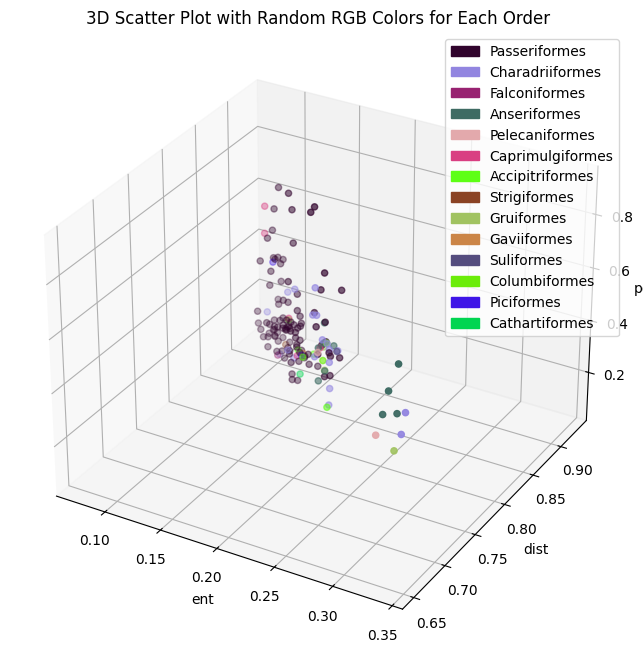

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# create some jittered x and y data and use 'pow' for z
x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0])
y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0])
z = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0])

# Get unique orders from the categorical column.
unique_orders = data['ORDER1_eBird'].unique()

# Create a mapping from each order to a random RGB color.
# Each color is a tuple of 3 numbers (red, green, blue) between 0 and 1.
order_random_map = {order: tuple(np.random.rand(3)) for order in unique_orders}

# Map the random colors back to each row in the DataFrame based on the order.
colors = data['ORDER1_eBird'].map(order_random_map)

# Create the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('ent')
ax.set_ylabel('dist')
ax.set_zlabel('pow')
ax.set_title("3D Scatter Plot with Random RGB Colors for Each Order")

import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=order_random_map[order], label=order) 
                  for order in order_random_map]
ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1))

plt.show()

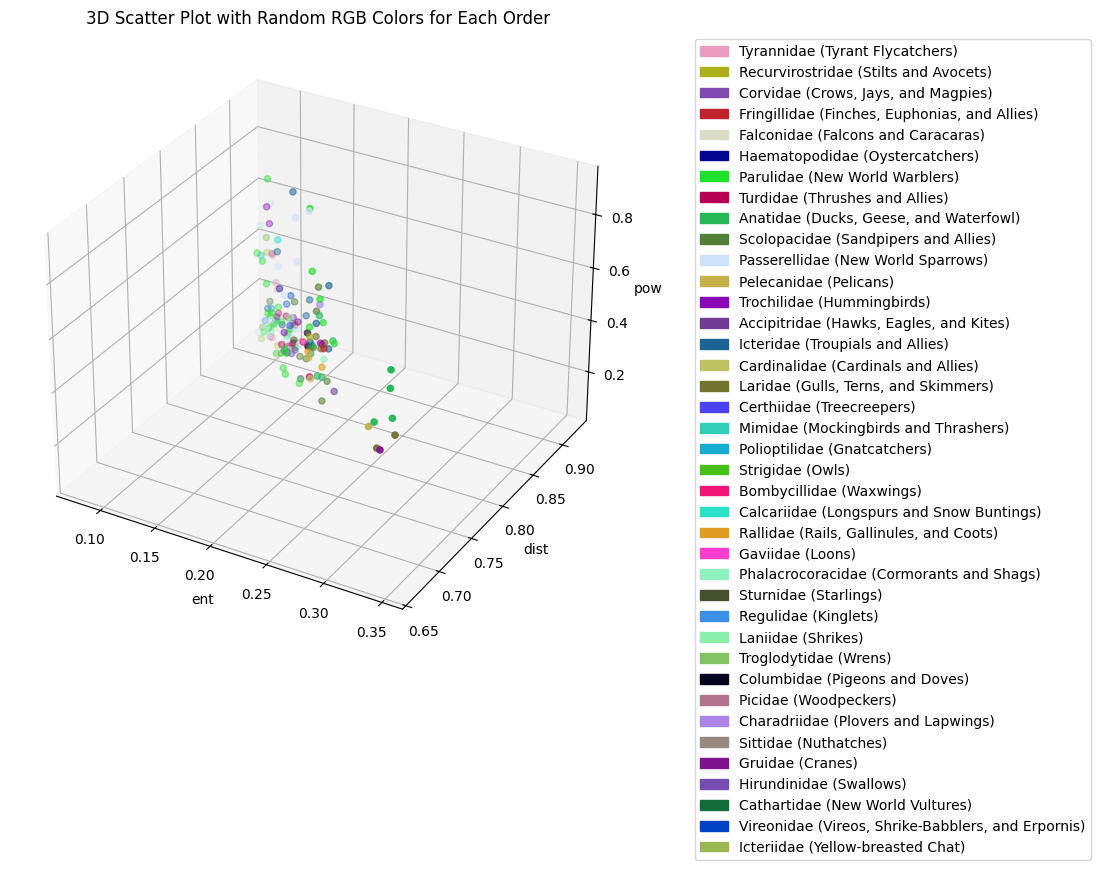

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# create some jittered x and y data and use 'pow' for z
x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0])
y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0])
z = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0])

# Get unique orders from the categorical column.
unique_orders = data['FAMILY1_eBird'].unique()

# Create a mapping from each order to a random RGB color.
# Each color is a tuple of 3 numbers (red, green, blue) between 0 and 1.
order_random_map = {order: tuple(np.random.rand(3)) for order in unique_orders}

# Map the random colors back to each row in the DataFrame based on the order.
colors = data['FAMILY1_eBird'].map(order_random_map)

# Create the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('ent')
ax.set_ylabel('dist')
ax.set_zlabel('pow')
ax.set_title("3D Scatter Plot with Random RGB Colors for Each Order")

import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=order_random_map[order], label=order) 
                  for order in order_random_map]
ax.legend(handles=legend_handles, bbox_to_anchor=(1.1, 1))

plt.show()

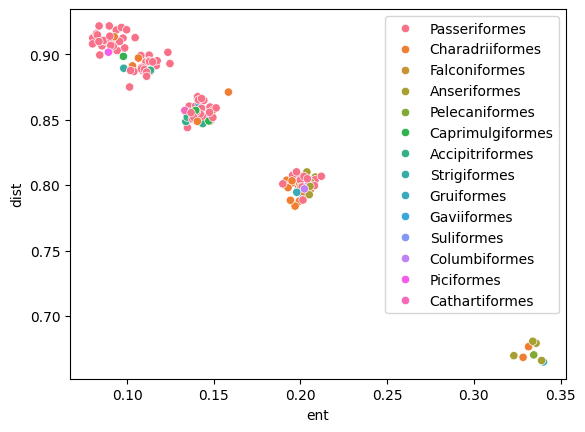

In [9]:
sns.scatterplot(
    x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0]),
    y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))


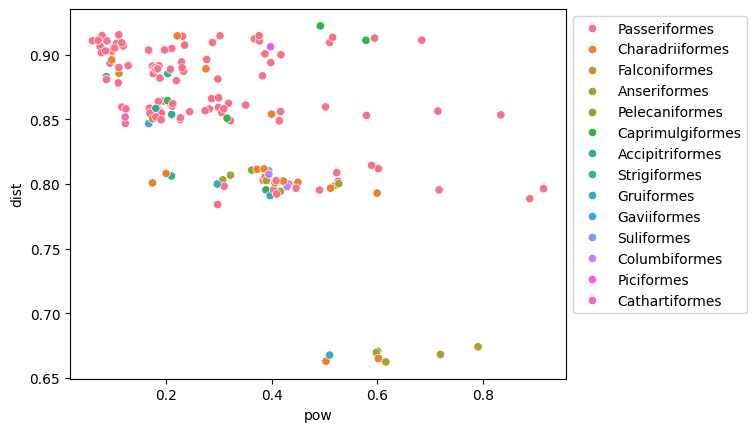

In [10]:
sns.scatterplot(
    x = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0]),
    y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))


## PCA

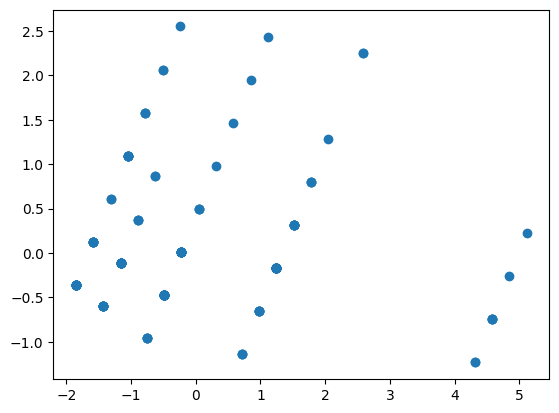

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2, random_state=42).fit(StandardScaler().fit_transform(data[['dist', 'pow', 'ent']]))
pca.explained_variance_ratio_
res = pca.transform(StandardScaler().fit_transform(data[['dist', 'pow', 'ent']]))
plt.scatter(res[:,0], res[:,1])


In [12]:
import sklearn
sklearn.__version__

'1.6.1'

In [13]:
data['common_name'].unique()

array(['Acadian Flycatcher', 'American Avocet', 'American Crow',
       'American Goldfinch', 'American Kestrel', 'American Oystercatcher',
       'American Redstart', 'American Robin', 'American Wigeon',
       'American Woodcock', 'American Tree Sparrow',
       'American White Pelican', "Anna's Hummingbird",
       'Bay-breasted Warbler', 'Bald Eagle', 'Baltimore Oriole',
       'Black-and-white Warbler', 'Blackburnian Warbler',
       'Black-chinned Hummingbird', 'Black-headed Grosbeak',
       'Black Skimmer', 'Blue Jay', 'Brown-headed Cowbird',
       'Broad-billed Hummingbird', 'Brown Creeper', 'Brown Pelican',
       'Brown Thrasher', 'Broad-winged Hawk',
       'Black-throated Blue Warbler', 'Black-throated Green Warbler',
       'Blue-gray Gnatcatcher', "Bullock's Oriole", 'Burrowing Owl',
       'Blue-winged Teal', 'California Gull', 'Cape May Warbler',
       'Canada Goose', 'Canvasback', 'Canada Warbler', 'Cedar Waxwing',
       'Cerulean Warbler', 'Chestnut-collared Longs

In [14]:
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.81301785 0.18698215]
[[-0.61896102  0.48350233  0.61896102]
 [ 0.34188777  0.87534308 -0.34188777]]


high dist, low pow, low ent

high dist, high pow, low ent

Text(0, 0.5, 'PC2')

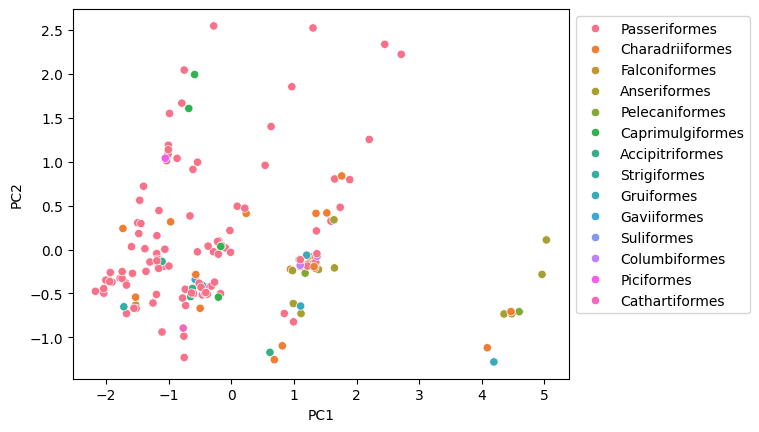

In [15]:
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/10, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

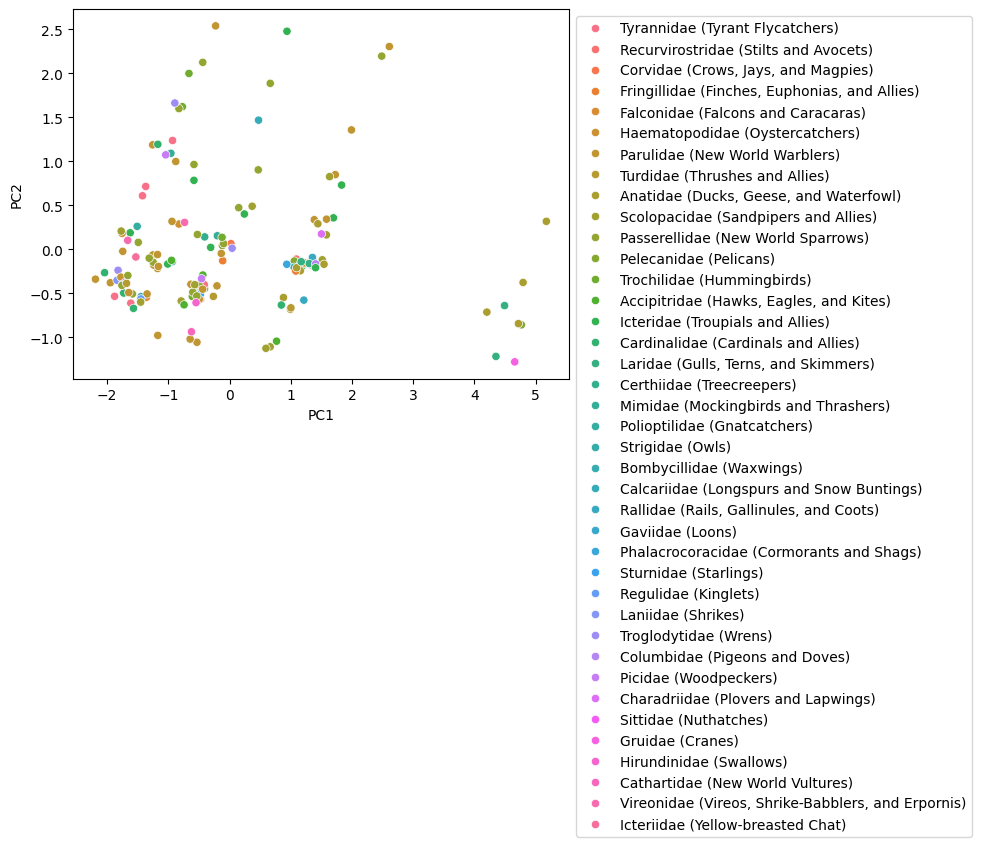

In [16]:
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/10, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/10, size=data.shape[0]),
    hue = data['FAMILY1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

In [17]:
data['PC1'] = res[:,0]
data['PC2'] = res[:,1]

Text(0, 0.5, 'PC2')

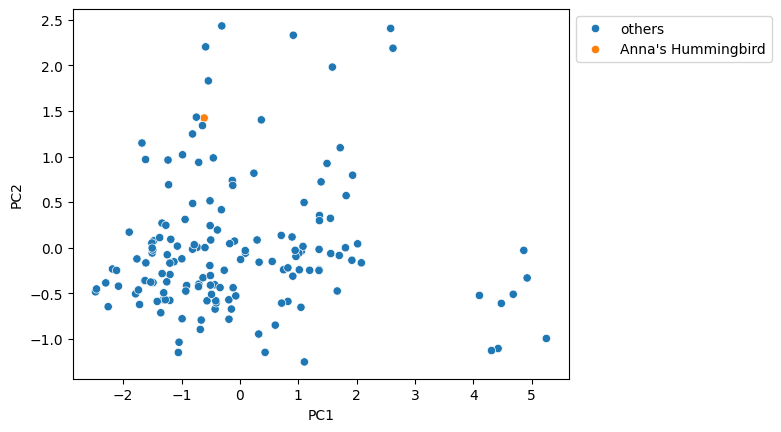

In [18]:
the_name = lambda x:"Anna's Hummingbird" if x=="Anna's Hummingbird" else "others"
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/5, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/5, size=data.shape[0]),
    hue = [the_name(i) for i in data['common_name'].values]
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')


# RandomForest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from scipy.stats import pearsonr

In [20]:
OneHotEncoder().fit_transform(data[['ORDER1_eBird']]).toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(153, 14))

(array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1.]),
 array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 ]),
 <BarContainer object of 10 artists>)

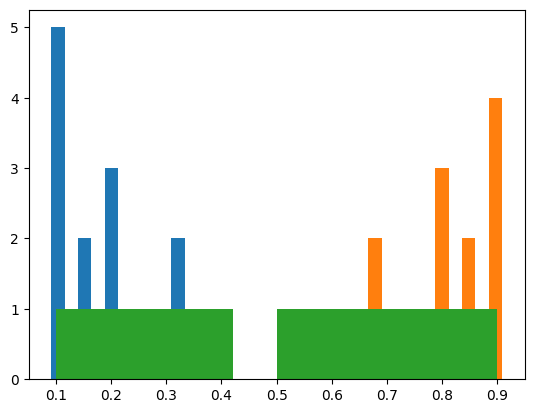

In [21]:
plt.hist(data['ent'].unique())
plt.hist(data['dist'].unique())
plt.hist(data['pow'].unique())

In [22]:
data

,sp,Unnamed: 0,common_name,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance_fraction,mean_win_distance,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,pit_row,pit_col,pit_in_95,mean_dist_cor,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,ent,dist,pow,model_param,train_n_banding,train_n_tracking,train_n_motus,test_n_banding,test_n_tracking,test_n_motus,nonbreeding_quality,prebreeding_migration_quality,breeding_quality,postbreeding_migration_quality,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,PC1,PC2
0,acafly,1,Acadian Flycatcher,ST098_and_LL,acafly_2023_150km_obs1.0_ent0.005848_dist0.046...,1.752348,1.911949,0.393953,0.472690,244.959987,245.028891,129.128675,135.253306,0.348158,0.416388,0.692503,0.666667,0.988049,0.910361,0.04,63190.270925,0.924506,0.01,1432.784654,0.911731,0.13,59571.973590,0.906630,0.02,2189.491915,77,0.111111,0.888889,0.1,obs1.0_ent0.005848_dist0.046784_pow0.1,23,0,54,6,0,27,3,3,3,3,Empidonax virescens,Passeriformes,Tyrannidae (Tyrant Flycatchers),Empidonax virescens,Empidonax virescens,13.3,9.1,6.1,4.0,17.1,71.0,19.9,52.1,27.5,58.8,12.6,3.0,26.59,45.34,36.73,-87.99,3006134.68,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.871565,80.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [23]:
# var_ = ['Beak_Length_Culmen', 'Beak_Length_Nares', 'Beak_Width', 'Beak_Depth', 'Tarsus_Length', 'Wing_Length', 
# 'Kipps_Distance', 'Secondary1', 'Hand.Wing_Index', 'Tail_Length', 'Mass', 
#  'nonbreeding_lon_c',
#  'nonbreeding_lat_c',
#  'nonbreeding_lat_max',
#  'nonbreeding_lat_min',
#  'nonbreeding_lon_max',
#  'nonbreeding_lon_min',
#  'nonbreeding_range_size',
#  'nonbreeding_abundance_variation',
#  'prebreeding_lon_c',
#  'prebreeding_lat_c',
#  'prebreeding_lat_max',
#  'prebreeding_lat_min',
#  'prebreeding_lon_max',
#  'prebreeding_lon_min',
#  'prebreeding_range_size',
#  'prebreeding_abundance_variation',
#  'breeding_lon_c',
#  'breeding_lat_c',
#  'breeding_lat_max',
#  'breeding_lat_min',
#  'breeding_lon_max',
#  'breeding_lon_min',
#  'breeding_range_size',
#  'breeding_abundance_variation',
#  'postbreeding_lon_c',
#  'postbreeding_lat_c',
#  'postbreeding_lat_max',
#  'postbreeding_lat_min',
#  'postbreeding_lon_max',
#  'postbreeding_lon_min',
#  'postbreeding_range_size',
#  'postbreeding_abundance_variation']
# X = data[var_].fillna(-999)

# def pearson_corr(y_true, y_pred):
#     return pearsonr(y_true, y_pred)[0]
# pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

# ###
# metircs = []
# for y_name in ['ent','dist','pow']:
#     y = data[y_name].fillna(-999)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     model = RandomForestRegressor(n_estimators=100, oob_score=True)
#     param_grid = {
#         'n_estimators': [50, 100, 200, 300],
#         'max_depth':    [None, 2, 5, 10, 20],
#         'min_samples_split': [2, 5, 10, 20]
#     }
#     grid = GridSearchCV(
#         estimator=RandomForestRegressor(random_state=42),
#         param_grid=param_grid,
#         cv=5, 
#         scoring='r2', 
#         n_jobs=1, 
#         return_train_score=True
#     )
#     grid.fit(X_train, y_train)
#     print("Best hyperparameters:", grid.best_params_)
#     print("Best CV R² score     :", grid.best_score_)
#     best_model = grid.best_estimator_

#     pred_test = best_model.predict(X_test)
#     pred_train = best_model.predict(X_train)
#     train_y_true_y_pred_df = pd.DataFrame({'y_train':y_train, 'y_train_pred':pred_train})
#     test_y_true_y_pred_df = pd.DataFrame({'y_test':y_test, 'y_test_pred':pred_test})
#     train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_true_y_pred_df_{y_name}.csv', index=False)
#     test_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/test_y_true_y_pred_df_{y_name}.csv', index=False)

#     print(
#         'Param: ', y_name,
#         '\n',
#         r2_score(y_test.values, pred_test),
#         '\n',
#         pearsonr(y_test.values, pred_test),
#         '\n',
#         spearmanr(y_test.values, pred_test),
#     )

#     best_param_index = grid.cv_results_['params'].index(grid.best_params_)
    

#     metircs.append({'hyperparameter':y_name,
#                     **grid.best_params_, 
#                     'CV':5, 
#                     'Best_model_CV_R2':grid.best_score_,
#                     'Best_model_CV_R2_train_mean': grid.cv_results_['mean_train_score'][best_param_index],
#                     'Best_model_CV_R2_train_std': grid.cv_results_['std_train_score'][best_param_index],
#                     'Best_model_CV_R2_test_mean': grid.cv_results_['mean_test_score'][best_param_index],
#                     'Best_model_CV_R2_test_std': grid.cv_results_['std_test_score'][best_param_index],
#                     'r2_train':r2_score(y_train.values, pred_train),
#                     'pearsonr_train':pearsonr(y_train.values, pred_train)[0],
#                     'pearsonr_p_train':pearsonr(y_train.values, pred_train)[1],
#                     'spearmanr_train':spearmanr(y_train.values, pred_train)[0],
#                     'spearmanr_p_train':spearmanr(y_train.values, pred_train)[1],
#                     'r2_test':r2_score(y_test.values, pred_test),
#                     'pearsonr_test':pearsonr(y_test.values, pred_test)[0],
#                     'pearsonr_p_test':pearsonr(y_test.values, pred_test)[1],
#                     'spearmanr_test':spearmanr(y_test.values, pred_test)[0],
#                     'spearmanr_p_test':spearmanr(y_test.values, pred_test)[1],
#                     })

#     print(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]))
#     feature_importances = pd.DataFrame(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]), columns=['feature', 'feature_importance'])
#     feature_importances.to_csv(f'../../data/08.Regression_for_hyperparameters/feature_importances_{y_name}.csv', index=False)

#     ## plot y_true vsd y_pred
#     plt.scatter(
#         y_test.values, pred_test
#     )
#     plt.plot([np.min(y_test.values), np.max(y_test.values)],
#             [np.min(y_test.values), np.max(y_test.values)], color='red')
#     plt.show()

#     print()

# metircs = pd.DataFrame(metircs)
# metircs.to_csv(f'../../data/08.Regression_for_hyperparameters/all_metrics.csv', index=False)


In [24]:
var_ = ['Beak_Length_Culmen', 'Beak_Length_Nares', 'Beak_Width', 'Beak_Depth', 'Tarsus_Length', 'Wing_Length', 
'Kipps_Distance', 'Secondary1', 'Hand.Wing_Index', 'Tail_Length', 'Mass', 
 'nonbreeding_lon_c',
 'nonbreeding_lat_c',
 'nonbreeding_lat_max',
 'nonbreeding_lat_min',
 'nonbreeding_lon_max',
 'nonbreeding_lon_min',
 'nonbreeding_range_size',
 'nonbreeding_abundance_variation',
 'prebreeding_lon_c',
 'prebreeding_lat_c',
 'prebreeding_lat_max',
 'prebreeding_lat_min',
 'prebreeding_lon_max',
 'prebreeding_lon_min',
 'prebreeding_range_size',
 'prebreeding_abundance_variation',
 'breeding_lon_c',
 'breeding_lat_c',
 'breeding_lat_max',
 'breeding_lat_min',
 'breeding_lon_max',
 'breeding_lon_min',
 'breeding_range_size',
 'breeding_abundance_variation',
 'postbreeding_lon_c',
 'postbreeding_lat_c',
 'postbreeding_lat_max',
 'postbreeding_lat_min',
 'postbreeding_lon_max',
 'postbreeding_lon_min',
 'postbreeding_range_size',
 'postbreeding_abundance_variation']
 
remove_list=[
    'Beak_Length_Culmen',
    'Beak_Depth',
    'nonbreeding_lat_min',
    'postbreeding_lat_min',
    'prebreeding_lat_min',
    'nonbreeding_lat_c',
    'postbreeding_lat_c',
    'prebreeding_lat_c',
    'postbreeding_range_size',
    'prebreeding_range_size',
    'postbreeding_lon_c',
    'prebreeding_lon_c',
    'nonbreeding_lon_c',
    'prebreeding_abundance_variation',
    'postbreeding_lon_min',
    'prebreeding_lat_max',
    'nonbreeding_lon_min',
    'breeding_lon_min',
    'Kipps_Distance',
    'Secondary1',
    'Tail_Length',
    'Tarsus_Length',
    'prebreeding_lon_min',
    'postbreeding_lat_max',
    'postbreeding_abundance_variation',
    'nonbreeding_abundance_variation',
    'prebreeding_lon_max'
]

var_ = list(set(var_) - set(remove_list))
X = data[var_].fillna(-999)


In [25]:
X.columns

Index(['nonbreeding_lon_max', 'breeding_range_size', 'Beak_Length_Nares',
       'breeding_lon_c', 'breeding_lat_c', 'Wing_Length', 'breeding_lat_max',
       'nonbreeding_lat_max', 'Mass', 'Beak_Width', 'nonbreeding_range_size',
       'Hand.Wing_Index', 'postbreeding_lon_max', 'breeding_lat_min',
       'breeding_abundance_variation', 'breeding_lon_max'],
      dtype='object')

In [74]:
X.corr().abs()>0.8



,Hand.Wing_Index,breeding_lon_max,nonbreeding_range_size,breeding_lat_c,nonbreeding_lat_max,Mass,breeding_lon_c,Beak_Width,nonbreeding_lon_max,postbreeding_lon_max,breeding_abundance_variation,Wing_Length,breeding_lat_max,breeding_lat_min,breeding_range_size,Beak_Length_Nares
Hand.Wing_Index,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
breeding_lon_max,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
nonbreeding_range_size,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
breeding_lat_c,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
nonbreeding_lat_max,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Mass,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
breeding_lon_c,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Beak_Width,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
nonbreeding_lon_max,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
postbreeding_lon_max,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [75]:
X.columns

Index(['Hand.Wing_Index', 'breeding_lon_max', 'nonbreeding_range_size',
       'breeding_lat_c', 'nonbreeding_lat_max', 'Mass', 'breeding_lon_c',
       'Beak_Width', 'nonbreeding_lon_max', 'postbreeding_lon_max',
       'breeding_abundance_variation', 'Wing_Length', 'breeding_lat_max',
       'breeding_lat_min', 'breeding_range_size', 'Beak_Length_Nares'],
      dtype='object')

In [76]:
var_

['Hand.Wing_Index',
 'breeding_lon_max',
 'nonbreeding_range_size',
 'breeding_lat_c',
 'nonbreeding_lat_max',
 'Mass',
 'breeding_lon_c',
 'Beak_Width',
 'nonbreeding_lon_max',
 'postbreeding_lon_max',
 'breeding_abundance_variation',
 'Wing_Length',
 'breeding_lat_max',
 'breeding_lat_min',
 'breeding_range_size',
 'Beak_Length_Nares']

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

X = data[var_].fillna(-999)

targets = ['ent','dist','pow']

# Modeling components
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=-999)),
    ("rf", RandomForestRegressor(random_state=42))
])

param_grid = {
    "rf__n_estimators": [50, 100, 200, 300],
    "rf__max_depth": [2, 5, 10, 20],
    "rf__min_samples_split": [2, 5, 10, 20],
}

# param_grid = {
#     "rf__n_estimators": [50],
#     "rf__max_depth": [None, 5, 10, 20],
# }

# Outer CV (produces out-of-fold predictions)
outer_cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)  # 9 folds total

# Inner CV (hyperparameter tuning within each outer-fold training split)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

all_metrics = []

for y_name in targets:
    y = data[y_name]

    # Storage for OOF predictions and per-fold results
    oof_pred = np.full_like(y, fill_value=np.nan, dtype=float)
    outer_fold_scores = []
    per_fold_best_params = []
    per_fold_importances = []
    per_fold_sizes = []

    # Nested CV loop
    for train_idx, test_idx in outer_cv.split(X, y):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            cv=inner_cv,
            scoring="r2",
            n_jobs=-1,
            return_train_score=True
        )
        grid.fit(X_tr, y_tr)

        best_model = grid.best_estimator_
        y_te_pred = best_model.predict(X_te)

        # Store OOF predictions
        oof_pred[test_idx] = y_te_pred

        # Outer-fold performance (this is a valid generalization estimate)
        fold_r2 = r2_score(y_te, y_te_pred)
        outer_fold_scores.append(fold_r2)
        per_fold_best_params.append(grid.best_params_)
        per_fold_sizes.append(len(test_idx))

        # Extract feature importances from the RF inside the pipeline
        rf = best_model.named_steps["rf"]
        per_fold_importances.append(rf.feature_importances_)

    # Sanity check: ensure all OOF slots filled
    assert not np.isnan(oof_pred).any(), "Some OOF predictions are missing!"

    # --- Metrics ---
    # 1) Fold-averaged R^2 (across outer test folds)
    r2_mean = np.mean(outer_fold_scores)
    r2_std = np.std(outer_fold_scores)

    # 2) Pooled R^2 computed on all OOF predictions
    r2_pooled = r2_score(y, oof_pred)

    # Correlations on OOF predictions (nice to report/annotate)
    pear = pearsonr(y, oof_pred)
    spear = spearmanr(y, oof_pred)

    # --- Aggregate feature importances across outer folds ---
    # Weighted by fold size (optional but reasonable)
    per_fold_importances = np.vstack(per_fold_importances)  # shape: (n_outer_folds, n_features)
    weights = np.array(per_fold_sizes) / np.sum(per_fold_sizes)
    agg_importances = (per_fold_importances.T @ weights).ravel()

    feat_imp_df = pd.DataFrame({
        "feature": var_,
        "importance_mean": agg_importances
    }).sort_values("importance_mean", ascending=False)

    # --- Save outputs ---
    out_dir = "../../data/08.Regression_for_hyperparameters"
    pd.DataFrame({'y':y, 'oof_pred':oof_pred}).to_csv(f"{out_dir}/y_and_oof_pred_by_{y_name}.csv", index=False)
    feat_imp_df.to_csv(f"{out_dir}/feature_importances_oof_{y_name}.csv", index=False)
    pd.DataFrame(per_fold_best_params).to_csv(f"{out_dir}/best_params_by_outer_fold_{y_name}.csv", index=False)
    
    # --- Plot: Observed vs OOF Predicted (Panel A) ---
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(y, oof_pred, alpha=0.8, edgecolor="white", linewidth=0.5)
    lims = [np.nanmin([y.min(), oof_pred.min()]), np.nanmax([y.max(), oof_pred.max()])]
    ax.plot(lims, lims, linestyle="--")
    ax.set_xlim(lims); ax.set_ylim(lims)
    ax.set_xlabel(f"Observed {y_name}")
    ax.set_ylabel(f"Predicted {y_name} (OOF, nested CV)")
    ax.set_title(f"{y_name}: Observed vs Predicted (OOF)")
    ax.text(0.04, 0.96,
            f"$R^2_{{fold-avg}}$ = {r2_mean:.2f} ± {r2_std:.2f}\n"
            f"$R^2_{{pooled}}$ = {r2_pooled:.2f}\n"
            f"Pearson r = {pear[0]:.2f}",
            transform=ax.transAxes, va="top", ha="left")
    plt.tight_layout()
    plt.show()

    # Collect summary metrics
    all_metrics.append({
        "target": y_name,
        "outer_cv_splits": f"{outer_cv.n_repeats}x{int(outer_cv.get_n_splits() / outer_cv.n_repeats)}",
        "r2_fold_avg_mean": r2_mean,
        "r2_fold_avg_std": r2_std,
        "r2_pooled_oof": r2_pooled,
        "pearson_r_oof": pear[0],
        "pearson_p_oof": pear[1],
        "spearman_r_oof": spear[0],
        "spearman_p_oof": spear[1],
    })

# Save the metrics table
all_metrics_df = pd.DataFrame(all_metrics)
all_metrics_df.to_csv("../../data/08.Regression_for_hyperparameters/all_metrics_nestedCV.csv", index=False)
print(all_metrics_df)


KeyboardInterrupt: 

,y,oof_pred
0,0.888889,0.850453
1,0.800004,NaN
2,0.857143,0.811797
3,0.857143,0.862916
4,0.888892,0.837061
...,...,...
148,0.888889,0.879117
149,0.909091,0.849979
150,0.800004,0.880934
151,0.909091,0.882706


In [ ]:
oof_pred

array([0.85045302,        nan, 0.81179719, 0.86291626, 0.83706055,
       0.81278651, 0.86396388, 0.85285407, 0.70666487, 0.84509833,
       0.88086309, 0.76202015, 0.84989954, 0.85754501,        nan,
       0.85267809, 0.85032083, 0.88435204, 0.84917117, 0.86112263,
              nan,        nan, 0.84740378, 0.8464753 , 0.88185193,
       0.81232861, 0.86189478, 0.82271884, 0.88012807, 0.87218621,
       0.88315267, 0.8535236 , 0.83738372, 0.81536582, 0.80879764,
       0.86167049, 0.7408821 ,        nan, 0.88352066, 0.85636804,
       0.85906701,        nan, 0.8811935 , 0.88247785, 0.86709181,
       0.88457907, 0.86260165, 0.80531122,        nan, 0.82110665,
       0.86406464, 0.83171283,        nan, 0.86512345, 0.88871085,
       0.86482071, 0.84877732,        nan,        nan,        nan,
       0.82901186, 0.87838285, 0.87864443, 0.88716114, 0.87959856,
       0.86338897, 0.85287544, 0.88437272, 0.88439841, 0.87205904,
       0.89012584,        nan, 0.84447722, 0.81650073,        

In [ ]:
    all_metrics.append({
        "target": y_name,
        "outer_cv_splits": f"{outer_cv.n_repeats}x{int(outer_cv.get_n_splits() / outer_cv.n_repeats)}",
        "r2_fold_avg_mean": r2_mean,
        "r2_fold_avg_std": r2_std,
        "r2_pooled_oof": r2_pooled,
        "pearson_r_oof": pear[0],
        "pearson_p_oof": pear[1],
        "spearman_r_oof": spear[0],
        "spearman_p_oof": spear[1],
    })

In [ ]:
    all_metrics.append({
        "target": y_name,
        "outer_cv_splits": f"{outer_cv.n_splits}x{int(outer_cv.get_n_splits() / outer_cv.n_repeats)}",
        "r2_fold_avg_mean": r2_mean,
        "r2_fold_avg_std": r2_std,
        "r2_pooled_oof": r2_pooled,
        "pearson_r_oof": pear[0],
        "pearson_p_oof": pear[1],
        "spearman_r_oof": spear[0],
        "spearman_p_oof": spear[1],
    })


AttributeError: 'RepeatedKFold' object has no attribute 'n_splits'

5

In [ ]:
 / 

25

In [ ]:

def pearson_corr(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]
pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

###
metircs = []
for y_name in ['ent','dist','pow']:
    y = data[y_name].fillna(-999)

    model = RandomForestRegressor(n_estimators=100, oob_score=True)
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth':    [None, 2, 5, 10, 20],
        'min_samples_split': [2, 5, 10, 20]
    }
    grid = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=5, 
        scoring='r2', 
        n_jobs=1, 
        return_train_score=True
    )
    grid.fit(X, y)
    print("Best hyperparameters:", grid.best_params_)
    print("Best CV R² score     :", grid.best_score_)
    best_model = grid.best_estimator_

    pred = best_model.predict(X)
    train_y_true_y_pred_df = pd.DataFrame({'y':y, 'y_pred':pred})
    # test_y_true_y_pred_df = pd.DataFrame({'y_test':y_test, 'y_test_pred':pred_test})
    # train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_true_y_pred_df_{y_name}.csv', index=False)
    # test_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/test_y_true_y_pred_df_{y_name}.csv', index=False)
    train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_cv_true_y_pred_df_{y_name}.csv', index=False)

    print(
        'Param: ', y_name,
        '\n',
        r2_score(y.values, pred),
        '\n',
        pearsonr(y.values, pred),
        '\n',
        spearmanr(y.values, pred),
    )

    best_param_index = grid.cv_results_['params'].index(grid.best_params_)
    

    metircs.append({'hyperparameter':y_name,
                    **grid.best_params_, 
                    'CV':5, 
                    'Best_model_CV_R2':grid.best_score_,
                    'Best_model_CV_R2_train_mean': grid.cv_results_['mean_train_score'][best_param_index],
                    'Best_model_CV_R2_train_std': grid.cv_results_['std_train_score'][best_param_index],
                    'Best_model_CV_R2_test_mean': grid.cv_results_['mean_test_score'][best_param_index],
                    'Best_model_CV_R2_test_std': grid.cv_results_['std_test_score'][best_param_index],
                    'r2':r2_score(y.values, pred),
                    'pearsonr':pearsonr(y.values, pred)[0],
                    'pearsonr_p':pearsonr(y.values, pred)[1],
                    'spearmanr':spearmanr(y.values, pred)[0],
                    'spearmanr_p':spearmanr(y.values, pred)[1],
                    })

    print(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]))
    feature_importances = pd.DataFrame(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]), columns=['feature', 'feature_importance'])
    feature_importances.to_csv(f'../../data/08.Regression_for_hyperparameters/feature_importances_{y_name}.csv', index=False)

    ## plot y_true vsd y_pred
    plt.scatter(
        y.values, pred
    )
    plt.plot([np.min(y.values), np.max(y.values)],
            [np.min(y.values), np.max(y.values)], color='red')
    plt.show()

    print()

metircs = pd.DataFrame(metircs)
metircs.to_csv(f'../../data/08.Regression_for_hyperparameters/all_metrics.csv', index=False)


In [ ]:
var_ = ['Beak_Length_Culmen', 'Beak_Length_Nares', 'Beak_Width', 'Beak_Depth', 'Tarsus_Length', 'Wing_Length', 
'Kipps_Distance', 'Secondary1', 'Hand.Wing_Index', 'Tail_Length', 'Mass', 
 'nonbreeding_lon_c',
 'nonbreeding_lat_c',
 'nonbreeding_lat_max',
 'nonbreeding_lat_min',
 'nonbreeding_lon_max',
 'nonbreeding_lon_min',
 'nonbreeding_range_size',
 'nonbreeding_abundance_variation',
 'prebreeding_lon_c',
 'prebreeding_lat_c',
 'prebreeding_lat_max',
 'prebreeding_lat_min',
 'prebreeding_lon_max',
 'prebreeding_lon_min',
 'prebreeding_range_size',
 'prebreeding_abundance_variation',
 'breeding_lon_c',
 'breeding_lat_c',
 'breeding_lat_max',
 'breeding_lat_min',
 'breeding_lon_max',
 'breeding_lon_min',
 'breeding_range_size',
 'breeding_abundance_variation',
 'postbreeding_lon_c',
 'postbreeding_lat_c',
 'postbreeding_lat_max',
 'postbreeding_lat_min',
 'postbreeding_lon_max',
 'postbreeding_lon_min',
 'postbreeding_range_size',
 'postbreeding_abundance_variation']
X = data[var_].fillna(-999)

def pearson_corr(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]
pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

###
metircs = []
for y_name in ['ent','dist','pow']:
    y = data[y_name].fillna(-999)

    model = RandomForestRegressor(n_estimators=100, oob_score=True)
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth':    [None, 2, 5, 10, 20],
        'min_samples_split': [2, 5, 10, 20]
    }
    grid = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=5, 
        scoring='r2', 
        n_jobs=1, 
        return_train_score=True
    )
    grid.fit(X, y)
    print("Best hyperparameters:", grid.best_params_)
    print("Best CV R² score     :", grid.best_score_)
    best_model = grid.best_estimator_

    pred = best_model.predict(X)
    train_y_true_y_pred_df = pd.DataFrame({'y':y, 'y_pred':pred})
    # test_y_true_y_pred_df = pd.DataFrame({'y_test':y_test, 'y_test_pred':pred_test})
    # train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_true_y_pred_df_{y_name}.csv', index=False)
    # test_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/test_y_true_y_pred_df_{y_name}.csv', index=False)
    train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_cv_true_y_pred_df_{y_name}.csv', index=False)

    print(
        'Param: ', y_name,
        '\n',
        r2_score(y.values, pred),
        '\n',
        pearsonr(y.values, pred),
        '\n',
        spearmanr(y.values, pred),
    )

    best_param_index = grid.cv_results_['params'].index(grid.best_params_)
    

    metircs.append({'hyperparameter':y_name,
                    **grid.best_params_, 
                    'CV':5, 
                    'Best_model_CV_R2':grid.best_score_,
                    'Best_model_CV_R2_train_mean': grid.cv_results_['mean_train_score'][best_param_index],
                    'Best_model_CV_R2_train_std': grid.cv_results_['std_train_score'][best_param_index],
                    'Best_model_CV_R2_test_mean': grid.cv_results_['mean_test_score'][best_param_index],
                    'Best_model_CV_R2_test_std': grid.cv_results_['std_test_score'][best_param_index],
                    'r2':r2_score(y.values, pred),
                    'pearsonr':pearsonr(y.values, pred)[0],
                    'pearsonr_p':pearsonr(y.values, pred)[1],
                    'spearmanr':spearmanr(y.values, pred)[0],
                    'spearmanr_p':spearmanr(y.values, pred)[1],
                    })

    print(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]))
    feature_importances = pd.DataFrame(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]), columns=['feature', 'feature_importance'])
    feature_importances.to_csv(f'../../data/08.Regression_for_hyperparameters/feature_importances_{y_name}.csv', index=False)

    ## plot y_true vsd y_pred
    plt.scatter(
        y.values, pred
    )
    plt.plot([np.min(y.values), np.max(y.values)],
            [np.min(y.values), np.max(y.values)], color='red')
    plt.show()

    print()

metircs = pd.DataFrame(metircs)
metircs.to_csv(f'../../data/08.Regression_for_hyperparameters/all_metrics.csv', index=False)


KeyboardInterrupt: 

In [ ]:
data


,sp,Unnamed: 0,common_name,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance_fraction,mean_win_distance,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,pit_row,pit_col,pit_in_95,mean_dist_cor,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,ent,dist,pow,model_param,train_n_banding,train_n_tracking,train_n_motus,test_n_banding,test_n_tracking,test_n_motus,nonbreeding_quality,prebreeding_migration_quality,breeding_quality,postbreeding_migration_quality,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,PC1,PC2
0,acafly,1,Acadian Flycatcher,ST098_and_LL,acafly_2023_150km_obs1.0_ent0.005848_dist0.046...,1.752348,1.911949,0.393953,0.472690,244.959987,245.028891,129.128675,135.253306,0.348158,0.416388,0.692503,0.666667,0.988049,0.910361,0.04,63190.270925,0.924506,0.01,1432.784654,0.911731,0.13,59571.973590,0.906630,0.02,2189.491915,77,0.111111,0.888889,0.1,obs1.0_ent0.005848_dist0.046784_pow0.1,23,0,54,6,0,27,3,3,3,3,Empidonax virescens,Passeriformes,Tyrannidae (Tyrant Flycatchers),Empidonax virescens,Empidonax virescens,13.3,9.1,6.1,4.0,17.1,71.0,19.9,52.1,27.5,58.8,12.6,3.0,26.59,45.34,36.73,-87.99,3006134.68,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.871565,80.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

<Axes: xlabel='Mass', ylabel='ent'>

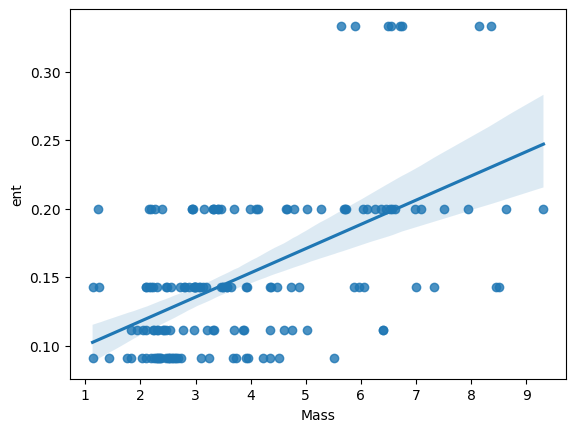

In [ ]:
# plt.scatter(
#     np.log(data['Mass']),
#     data['ent']
# )

sns.regplot(
    x=np.log(data['Mass']),
    y=data['ent']
)


<Axes: xlabel='Mass', ylabel='dist'>

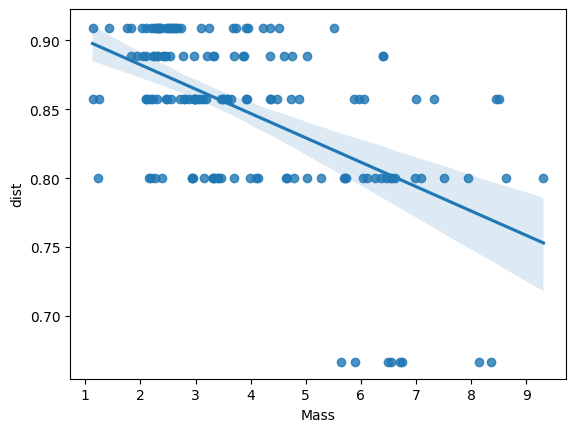

In [ ]:
sns.regplot(
    x=np.log(data['Mass']),
    y=data['dist']
)


In [ ]:
from scipy.stats import pearsonr
pearsonr(np.log(data['postbreeding_abundance_variation']),
        data['pow'])


PearsonRResult(statistic=np.float64(0.459417056310019), pvalue=np.float64(2.323494198411332e-09))

In [ ]:
tmp = data[['Mass', 'pow']].dropna()

pearsonr(np.log(tmp['Mass']),
         tmp['pow'])


PearsonRResult(statistic=np.float64(0.19211834515967371), pvalue=np.float64(0.017355412522670716))

<Axes: xlabel='postbreeding_abundance_variation', ylabel='pow'>

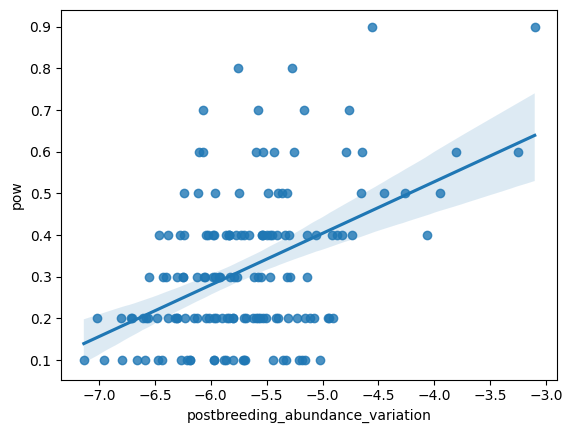

In [ ]:
sns.regplot(
    x=np.log(data['postbreeding_abundance_variation']),
    y=data['pow']
)
